In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

In [18]:
df=pd.read_csv("~/Documents/GitHub/Housepricing_project/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [176]:
df.describe()

#total number of obs=1460, with some missing values, let's check variables' correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [120]:
#check uniqueness, all unique
print(df['Id'].nunique())

1460


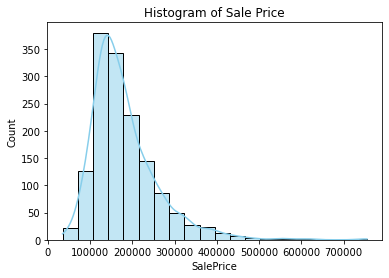

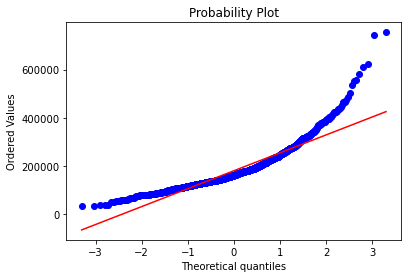

In [19]:
#outcome variable is house sale price
sns.histplot(df['SalePrice'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Sale Price')
plt.show()
res = stats.probplot(df['SalePrice'], plot=plt)


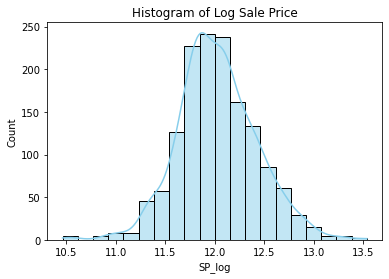

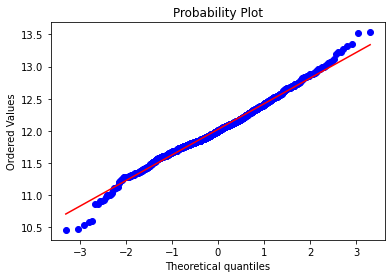

In [20]:
df['SP_log']=np.log(df['SalePrice'])
sns.histplot(df['SP_log'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Log Sale Price')
plt.show()
res = stats.probplot(df['SP_log'], plot=plt)


In [13]:
#then we will dive into independent variables

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Y=df['SP_log']
X=df
X = X.drop(['Id','SalePrice','SP_log'],axis=1).copy()

object_variables = X.select_dtypes(include=['object']).columns.tolist()
num_variables = X.select_dtypes(include=['float','int']).columns.tolist()
print(num_variables)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [14]:
X.loc[:, object_variables] = X.loc[:, object_variables].fillna("Unknown")
X.loc[:, num_variables] = X.loc[:, num_variables].fillna(0)
missing_values = X.isnull().sum().reset_index()
print( missing_values)

            index  0
0      MSSubClass  0
1        MSZoning  0
2     LotFrontage  0
3         LotArea  0
4          Street  0
..            ... ..
74        MiscVal  0
75         MoSold  0
76         YrSold  0
77       SaleType  0
78  SaleCondition  0

[79 rows x 2 columns]


In [189]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

from sklearn.feature_selection import SelectKBest, f_regression

X_encoded = pd.get_dummies(X_train, columns=object_variables, drop_first=True)

# Initialize the SelectKBest object with the chi-square scoring function
selector = SelectKBest(score_func=f_regression, k=20)

# Fit the selector to your data
selector.fit(X_encoded, Y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_encoded.columns[selected_indices]

# Print the selected feature names
print("Selected features:", selected_features)

Selected features: Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'KitchenQual_TA',
       'FireplaceQu_Unknown', 'GarageFinish_Unf'],
      dtype='object')


           index    0
0      SalePrice    0
1    OverallQual    0
2      YearBuilt    0
3   YearRemodAdd    0
4     MasVnrArea    8
5    TotalBsmtSF    0
6       1stFlrSF    0
7      GrLivArea    0
8       FullBath    0
9   TotRmsAbvGrd    0
10    Fireplaces    0
11    GarageCars    0
12    GarageArea    0
13    Foundation    0
14      BsmtQual   37
15  BsmtFinType1   37
16   KitchenQual    0
17   FireplaceQu  690
18  GarageFinish   81


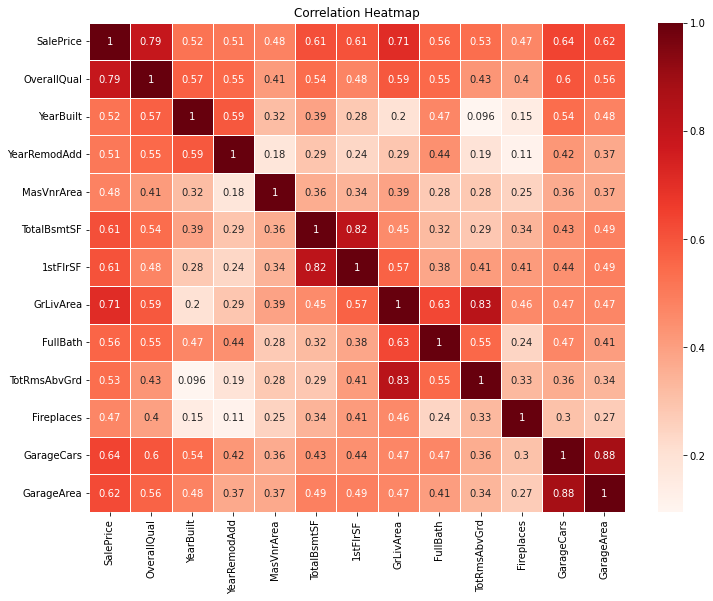

In [210]:
#correlation
features=['SalePrice','OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea','Foundation', 'BsmtQual', 'BsmtFinType1', 'KitchenQual',
       'FireplaceQu', 'GarageFinish']
missing_values = df[features].isnull().sum().reset_index()
print( missing_values)

corr_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix,annot=True,  linewidths=0.5,cmap="Reds")
plt.title('Correlation Heatmap')
plt.show()

In [214]:
features_cat=['Foundation', 'BsmtQual', 'BsmtFinType1', 'KitchenQual',
       'FireplaceQu', 'GarageFinish']

import itertools
from scipy.stats import chi2_contingency

combinations = list(itertools.combinations(features_cat, 2))

# Loop through each combination
for combo in combinations:
    # Extract the two variables in the current combination
    var1, var2 = combo
    
    # Create a contingency table for the two variables
    contingency_table = pd.crosstab(df[var1], df[var2])
    
    # Perform the chi-square test for independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the result
    print(f"Chi-square test result for {var1} and {var2}: p-value = {p}")


Chi-square test result for Foundation and BsmtQual: p-value = 1.1622518674612229e-144
Chi-square test result for Foundation and BsmtFinType1: p-value = 1.1389492230571179e-110
Chi-square test result for Foundation and KitchenQual: p-value = 3.671682107208284e-103
Chi-square test result for Foundation and FireplaceQu: p-value = 6.426391065206576e-10
Chi-square test result for Foundation and GarageFinish: p-value = 1.6653649295936322e-79
Chi-square test result for BsmtQual and BsmtFinType1: p-value = 2.2499926697592885e-94
Chi-square test result for BsmtQual and KitchenQual: p-value = 2.0667468654643634e-157
Chi-square test result for BsmtQual and FireplaceQu: p-value = 3.0289903533891243e-28
Chi-square test result for BsmtQual and GarageFinish: p-value = 6.363799214866666e-96
Chi-square test result for BsmtFinType1 and KitchenQual: p-value = 2.795096280163302e-63
Chi-square test result for BsmtFinType1 and FireplaceQu: p-value = 7.160327611304074e-13
Chi-square test result for BsmtFinTy

In [21]:
df['Built_yr_dff']=2024-df['YearBuilt']
df['Remodel_yr_dff']=2024-df['YearRemodAdd']

features_final=['SP_log','OverallQual', 'Built_yr_dff', 'Remodel_yr_dff','GrLivArea', 
        'FullBath', 'TotRmsAbvGrd', 'Fireplaces','GarageCars','Foundation']

In [22]:
df_final=df[features_final]

In [23]:
import statsmodels.api as sm
df_final_encoded = pd.get_dummies(df_final, drop_first=True)
Y=df_final_encoded['SP_log']
X=df_final_encoded
X = X.drop(['SP_log'], axis=1).copy()
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [26]:
#let's try different learning methods: regression,random forest, and SVM
#1,linear regression

X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)

model = sm.OLS(Y_train, X_train_c)
results = model.fit()

# Make predictions on the test data
Y_pred = results.predict(X_test_c)

# Print the summary of the regression results
print(results.summary())
#R2= 0.820
#adj R2=0.818


                            OLS Regression Results                            
Dep. Variable:                 SP_log   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     403.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:30:07   Log-Likelihood:                 441.24
No. Observations:                1168   AIC:                            -854.5
Df Residuals:                    1154   BIC:                            -783.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0462      0.05

In [28]:
RSS = np.sum((Y_test - Y_pred) ** 2)
TSS = np.sum((Y_test - np.mean(Y_test)) ** 2)
r_squared = 1 - (RSS / TSS)

print("R-squared score on the test data:", r_squared)


R-squared score on the test data: 0.8338093290453649


In [29]:
#2,random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R^2
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.030086680252054458
R^2 Score: 0.8387754513470578


In [30]:
print(best_model)

RandomForestRegressor(min_samples_leaf=4, n_estimators=300, random_state=42)


In [ ]:
#2,random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R^2
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


In [32]:
#3,XG boost
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

# Define a parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

ModuleNotFoundError: No module named 'xgboost'